In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline


In [3]:

#df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train (1).csv')


# Load the dataset
#df = pd.read_csv('train.csv')

In [4]:
# Exploratory Data Analysis (EDA)
print(df.info())  # Check for null values and data types
print(df.describe())  # Summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

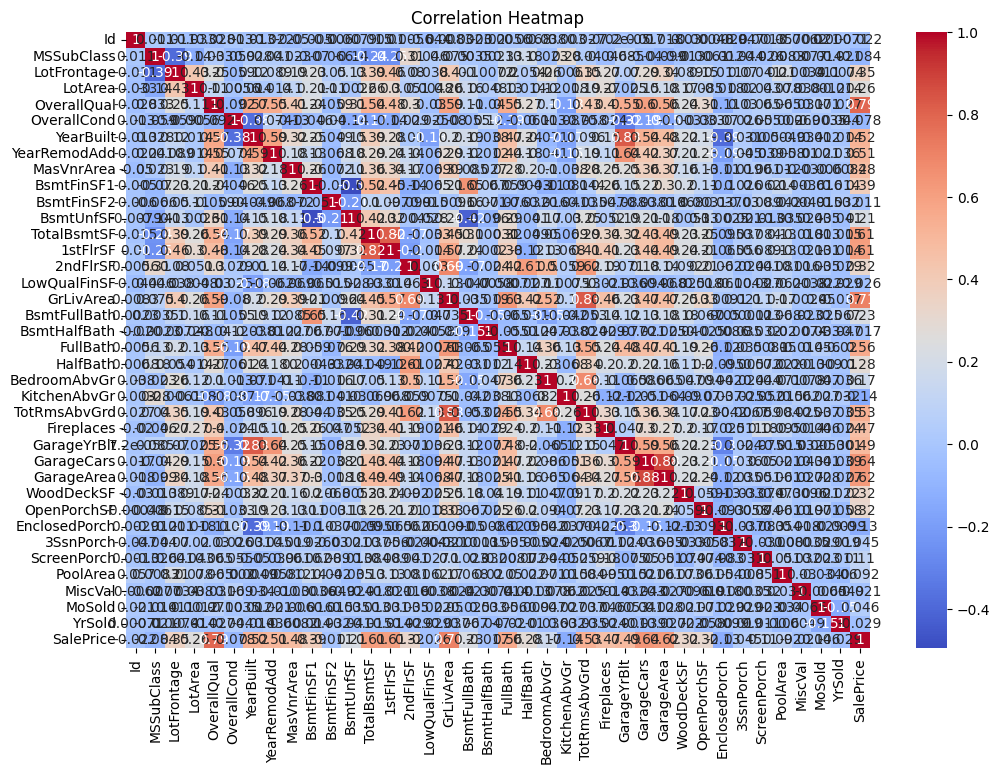

In [6]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


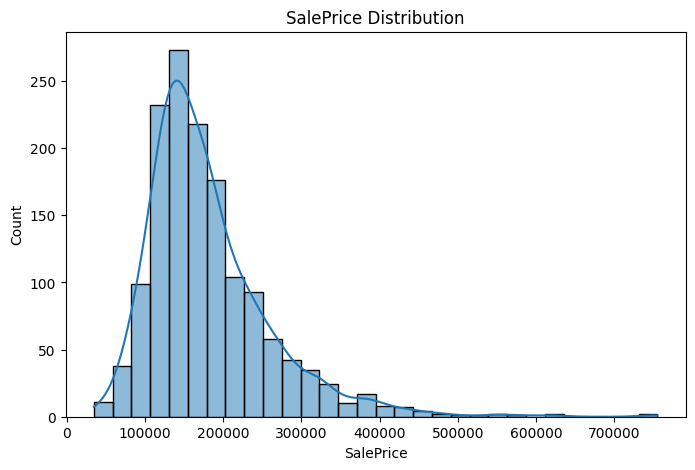

In [7]:
# Distribution of target variable (SalePrice)
plt.figure(figsize=(8, 5))
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title('SalePrice Distribution')
plt.show()

In [8]:
print(df.columns)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
# Selecting relevant features for the model
features = ['GrLivArea', 'BedroomAbvGr', 'Neighborhood', 'OverallQual', 'YearBuilt']  # Size, bedrooms, location
X = df[features]
y = df['SalePrice']

In [10]:
# Handling categorical variables (One-hot encode 'Neighborhood')
# and Scaling numerical features (Standardization)
numerical_features = ['GrLivArea', 'BedroomAbvGr', 'OverallQual', 'YearBuilt']
categorical_features = ['Neighborhood']



In [11]:
# Preprocessing: OneHotEncoding for categorical, StandardScaler for numerical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])




In [12]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Model Implementation
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

Model: LinearRegression
Mean Absolute Error (MAE): 23844.848911024335
Root Mean Squared Error (RMSE): 37881.616680351246
Model: DecisionTreeRegressor
Mean Absolute Error (MAE): 27966.01712328767
Root Mean Squared Error (RMSE): 40059.08184846774
Model: RandomForestRegressor
Mean Absolute Error (MAE): 20679.20658390411
Root Mean Squared Error (RMSE): 30053.173134552024


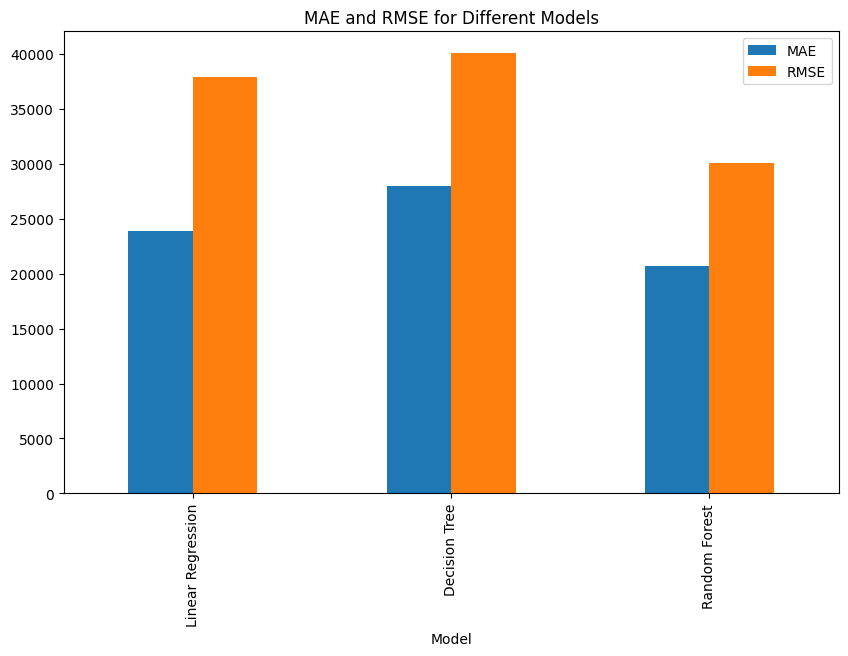

In [14]:


# Evaluate each model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print("="*40)

# Iterate over each model and evaluate
for model_name, model in models.items():
    evaluate_model(model, X_train, X_test, y_train, y_test)

# Plotting comparison of model errors (MAE and RMSE)
results = {
    "Model": [],
    "MAE": [],
    "RMSE": []
}

for model_name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    results["Model"].append(model_name)
    results["MAE"].append(mean_absolute_error(y_test, y_pred))
    results["RMSE"].append(np.sqrt(mean_squared_error(y_test, y_pred)))

results_df = pd.DataFrame(results)
results_df.set_index("Model", inplace=True)
results_df.plot(kind="bar", figsize=(10, 6), title="MAE and RMSE for Different Models")
plt.show()